# **Hyperspectral Imaging ML Model**

**Upload the Dataset**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving TASK-ML-INTERN.csv to TASK-ML-INTERN.csv


**Install Packages**

In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow


**0. Import Libraries**

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



**1. Load Dataset**


In [4]:
# Load the uploaded file
import io
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

**2. Data Exploration and Preprocessing**

In [5]:

# Clean column names (strip whitespace and convert to lowercase)
df.columns = df.columns.str.strip().str.lower()

# Display column names to confirm target name
print("\nColumn Names:\n", df.columns)

# Drop non-numeric columns (like IDs)
df = df.select_dtypes(include=[np.number])

# Fill missing values with mean (only for numeric columns)
df.fillna(df.mean(), inplace=True)

# Split features and target
# Replace 'vomitoxin_ppb' with the correct target column name if needed
X = df.drop(columns=['vomitoxin_ppb'])
y = df['vomitoxin_ppb']

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Column Names:
 Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)


**3. Data Visualization**

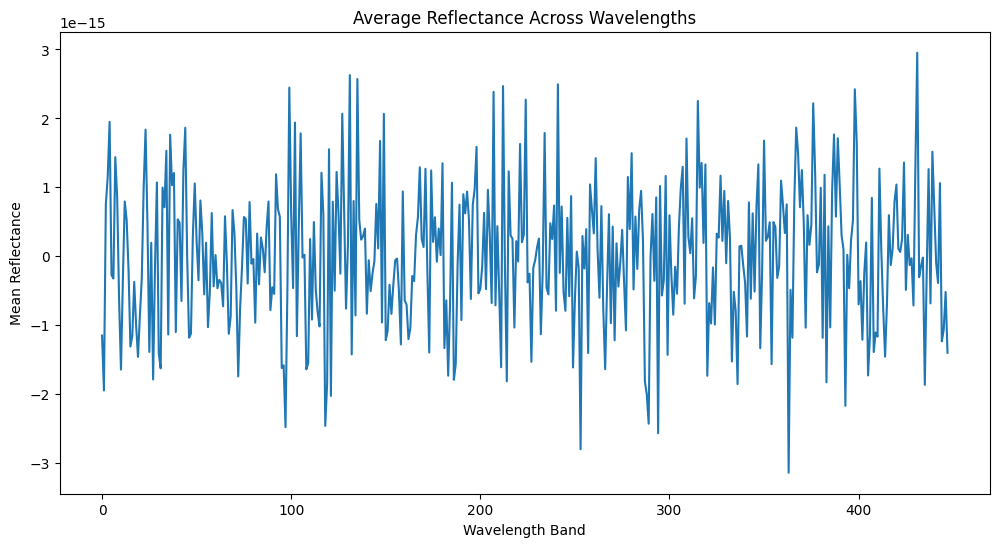

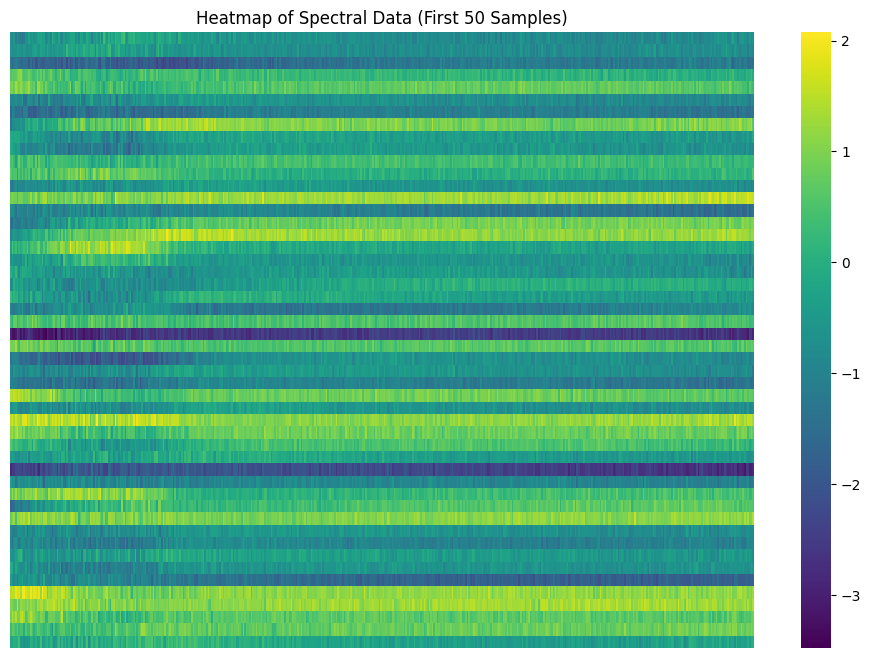

In [6]:
# Average Reflectance Plot
plt.figure(figsize=(12, 6))
plt.plot(X_scaled.mean(axis=0))
plt.title('Average Reflectance Across Wavelengths')
plt.xlabel('Wavelength Band')
plt.ylabel('Mean Reflectance')
plt.show()

# Heatmap for Sample Comparison
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled[:50], cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Heatmap of Spectral Data (First 50 Samples)')
plt.show()

 **4. PCA for Dimensionality Reductiion**

Explained Variance (PCA): [0.87077909 0.05849069]


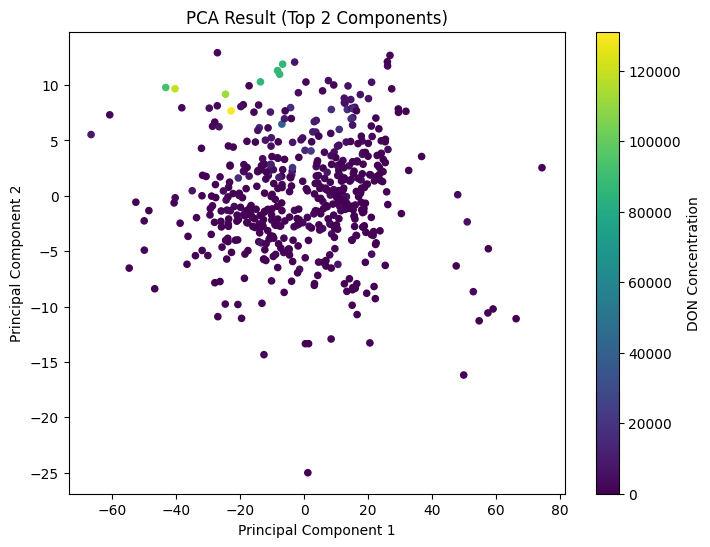

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance (PCA): {explained_variance}")

# PCA Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=20)
plt.colorbar(label='DON Concentration')
plt.title('PCA Result (Top 2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**5. t-SNE for Dimensionality Reduction**

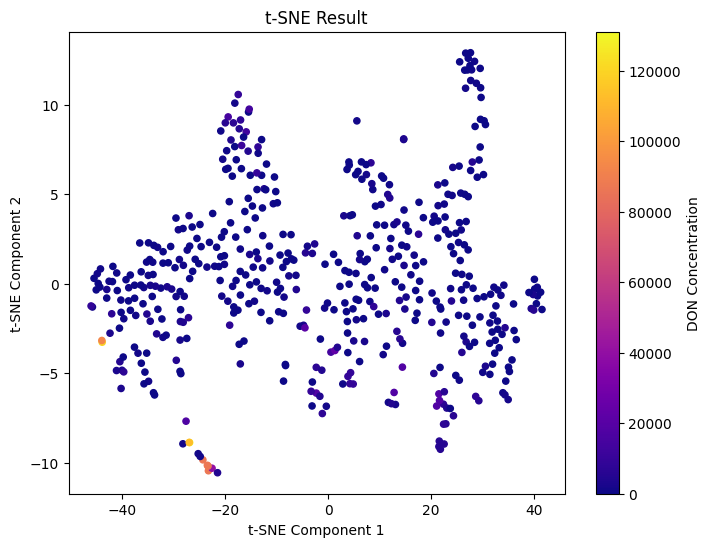

In [8]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# t-SNE Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma', s=20)
plt.colorbar(label='DON Concentration')
plt.title('t-SNE Result')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

**6. Model Training**

In [9]:
# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 205029504.0000 - val_loss: 203115952.0000
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 91229232.0000 - val_loss: 202698496.0000
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 97625904.0000 - val_loss: 201636832.0000
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 239049136.0000 - val_loss: 199723696.0000
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 286405344.0000 - val_loss: 197014272.0000
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 126153288.0000 - val_loss: 194188448.0000
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 153179280.0000 - val_loss: 189375920.0000
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 269064896.0000 - val_loss: 183015776.0000
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 99802040.0000 - val_loss: 177382992.0000
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 103691992.0000 - val_loss: 169329184.000

**7. Model Evaluation**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Mean Absolute Error (MAE): 3446.2526
Root Mean Squared Error (RMSE): 10768.2615
R² Score: 0.5852


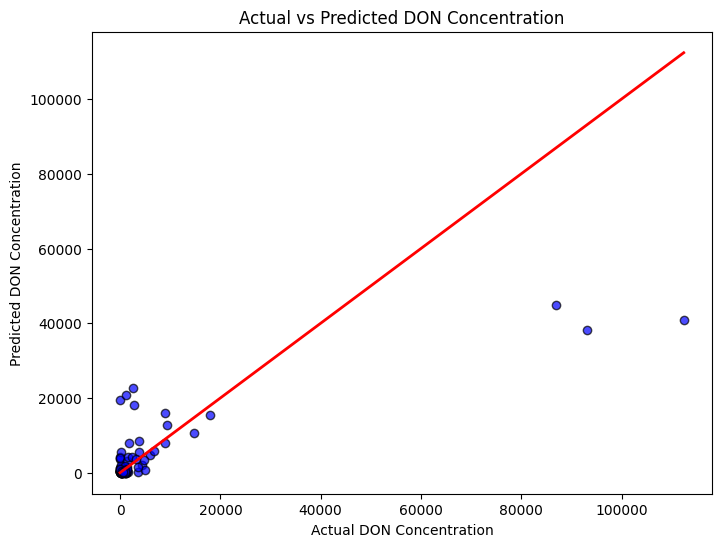

In [10]:

# Predict on Test Data
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'\nMean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted DON Concentration')
plt.xlabel('Actual DON Concentration')
plt.ylabel('Predicted DON Concentration')
plt.show()


**8. Save Model and Results**

In [11]:
# Save the trained model
model.save('model.h5')

# Save processed dataset
df.to_csv('processed_dataset.csv', index=False)

**9. Display Results**

In [12]:
results = {
    'MAE': mae,
    'RMSE': rmse,
    'R2': r2,
    'Explained Variance (PCA)': explained_variance.tolist()
}
print("\nResults:\n", results)


Results:
 {'MAE': 3446.2526398468017, 'RMSE': 10768.26146196657, 'R2': 0.5851816850289419, 'Explained Variance (PCA)': [0.8707790877502959, 0.05849069152322624]}


**10. Download Files**

In [13]:

from google.colab import files
files.download('model.h5')
files.download('processed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>